# <center> Исследование данных HR-агенства c помощью статистические тестов в контексте EDA.

## Постановка задачи

*HR*-агентство изучает тренды на рынке труда в *IT*. Компания хочет провести исследование на основе данных о зарплатах в сфере *Data Science* за 2020–2022 годы и получить некоторые выводы.

*HR*-агентство хочет ответить на следующие вопросы, касающиеся данных о зарплатах в сфере *Data Science*. 

**Основное исследование:**

* Вопрос-1. Наблюдается ли рост зарплат у специалистов *Data Scientist* за каждый год?
* Вопрос-2. Как соотносятся зарплаты *Data Scientist* и *Data Engineer* в 2022 году?
* Вопрос-3. Как соотносятся зарплаты специалистов *Data Scientist* и *Data Engineer* в компаниях различных размеров?
* Вопрос-4. Есть ли связь между наличием должностей *Data Scientist* и *Data Engineer* и размером компании?

**Дополнительное исследование:**

* Вопрос - 5. Есть ли зависимось уровня заработной платы специалиста *Data Scientist* в  зависимости от опыта работ (занимаемой должности)? 
* Вопрос - 6. Есть ли зависимость заработой платы от типа удалённости работы?


На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о заработных платах Data Scientist с указанием характеристик.

### Описание столбцов.
<br>
<table>
<tbody>
<tr style="background-color: #88cdb2; vertical-align: middle; text-transform: uppercase; color: #062425; font-weight: bold;">
<td>Наименование столбца</td>
<td>Описание</td>
</tr>
<tr>
<td style="width: 25%;"><span class="code-blue">work_year</span></td>
<td style="width: 75%;">Год, в котором была выплачена зарплата.</td>
</tr>
<tr>
<td><span class="code-blue">experience_level</span></td>
<td>Опыт работы на этой должности в течение года со следующими возможными значениями:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><em>EN — Entry-level/Junior;</em></li>
<li><em>MI — Mid-level/Intermediate;</em></li>
<li><em>SE — Senior-level/Expert;</em></li>
<li><em>EX — Executive-level/Director.</em></li>
</ul>
</ul>
</td>
</tr>
<tr>
<td><span class="code-blue">employment_type</span></td>
<td>Тип трудоустройства для этой роли:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><em>PT</em> — неполный рабочий день;</li>
<li><em>FT</em> — полный рабочий день;</li>
<li><em>CT</em> — контракт;</li>
<li><em>FL</em> — фриланс.</li>
</ul>
</ul>
</td>
</tr>
<tr>
<td><span class="code-blue">job_title</span></td>
<td>Роль, в которой соискатель работал в течение года.</td>
</tr>
<tr>
<td><span class="code-blue">salary</span></td>
<td>Общая выплаченная валовая сумма заработной платы.</td>
</tr>
<tr>
<td><span class="code-blue">salary_currency</span></td>
<td>Валюта выплачиваемой заработной платы в виде кода валюты <em>ISO</em> 4217.</td>
</tr>
<tr>
<td><span class="code-blue">salary_in_usd</span></td>
<td>Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через <em>fxdata.foorilla.com</em>).</td>
</tr>
<tr>
<td><span class="code-blue">employee_residence</span></td>
<td>Основная страна проживания сотрудника в течение рабочего года в виде кода страны <em>ISO</em> 3166.</td>
</tr>
<tr>
<td><span class="code-blue">remote_ratio</span></td>
<td>Общий объём работы, выполняемой удалённо. Возможные значения:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li>0 — удалённой работы нет (менее 20 %);</li>
<li>50 — частично удалённая работа;</li>
<li>100 — полностью удалённая работа (более 80 %).</li>
</ul>
</ul>
</td>
</tr>
<tr>
<td><span class="code-blue">company_location</span></td>
<td>Страна главного офиса работодателя или филиала по контракту в виде кода страны <em>ISO</em> 3166.</td>
</tr>
<tr>
<td><span class="code-blue">company_size</span></td>
<td>Среднее количество людей, работавших в компании в течение года:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><em>S</em> — менее 50 сотрудников (небольшая компания);</li>
<li><em>M</em> — от 50 до 250 сотрудников (средняя компания);</li>
<li><em>L</em> — более 250 сотрудников (крупная компания).</li>
</ul>
</ul>
</td>
</tr>
</tbody>
</table>

Оригинальный датасет: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

# I. Загрузка и обработка данных

### Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import wget
# делаем визуальную настройку графиков
sns.set_theme("notebook")
sns.set_palette("Set2")

Данные были скопированы в Google Drive, они доступны по [ссылке](https://drive.google.com/file/d/1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r/view).

In [2]:
# Загружаем датасет.
df_salaries = pd.read_csv('data/ds_salaries.csv')

In [3]:
# Удалим не нужный столбец "Unnamed: 0".
df_salaries.drop('Unnamed: 0', axis=1, inplace=True)

df_salaries.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [4]:
# задаём уровень значимости
alpha = 0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


###  Описательный анализ данных

In [5]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


В датасете 607 записей, без пропущенных значений. 

### Пропуски и дубликаты, очистка.


Проверим данные на наличие полных дубликатов:

In [6]:
print('Количество дубликатов: {}'
      .format(df_salaries[df_salaries.duplicated()].shape[0])
      )

# Удаляем дубликаты:
df_salaries = df_salaries.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'
      .format(df_salaries.shape[0])
      )

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: 565


### Неинформативные признаки.

Рассмотрим данные по зарплате из таблицы *df_salaries*.

In [7]:
df_salaries[['salary', 'salary_currency',
             'salary_in_usd', 'work_year']].head(5)

,salary,salary_currency,salary_in_usd,work_year
0,70000,EUR,79833,2020
1,260000,USD,260000,2020
2,85000,GBP,109024,2020
3,20000,USD,20000,2020
4,150000,USD,150000,2020


В таблице столбец *salary* и *salary_currency* нам не нужны, т.к. есть столбец *salary_in_usd* он показывает уровень заработной платы в долларах за год. 

Создадим новый столбец **monthly_salary**, он будет показывать уровень зарплаты сотрудника в месяц. Лишние столбцы *salary* и *salary_currency*, *salary_in_usd* удалим

In [8]:
# Создаём новый столбец monthly_salary.
df_salaries['monthly_salary'] = df_salaries['salary_in_usd']/12

# Приводим столбец к типу данных int.
df_salaries['monthly_salary'] = df_salaries['monthly_salary'].astype('int64')

# Удаляем столбцы salary и salary_currency, salary_in_usd.
df_salaries.drop(['salary', 'salary_currency',
                 'salary_in_usd'], axis=1, inplace=True)

### Типы признаков.

Классифицируем признаки на числовые и дискретные.

In [9]:
df_salaries.describe()

,work_year,remote_ratio,monthly_salary
count,565.000000,565.000000,565.000000
mean,2021.364602,69.911504,9217.153982
std,0.698138,40.900666,6023.448732
min,2020.000000,0.000000,238.000000
25%,2021.000000,50.000000,5063.000000
50%,2021.000000,100.000000,8333.000000
75%,2022.000000,100.000000,12500.000000
max,2022.000000,100.000000,50000.000000


In [10]:
df_salaries.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,50,57,50,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


К числовым признакам можно отнести *work_year*, *remote_ratio*, *monthly_salary*. Остальные относятся к категориальным.

### Основные статистические характеристики

В двух таблицах выше приведены общие статестические характеристики признаков:
* **Числовые признаки** характерезуются средним значением, квантилями, минимальным и максимальным значением.
* **Категориальные признаки** показывают сколько уникальных значений строка *unique*, какое самое популярное значение *top*, а так же как часто оно встречается *freq*. 

### Преобразование данных


1. Преобразование признак *job_title*.

Из таблици выше видно, что у признака *job_title* 50 различных наименований должностей, рассмотрим их. 

In [11]:
df_salaries[['job_title']].value_counts().head(15).to_frame(name='Count')

,Count
job_title,
Data Scientist,130
Data Engineer,121
Data Analyst,82
Machine Learning Engineer,39
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8


Топ-15 типов работ это *Data Scientist*, *Data Engineer*, *Data Analyst* и т.д. составляет основную массу. Переменуем остальные наименования профессий как *other*.

In [12]:
# Преобразование признака 'job_title'.
# Создадим список топ-15 профессий
data = df_salaries[['job_title']].value_counts().head(15)
data = list(data.index)
top_15_prof = []
for i in range(len(data)):
    top_15_prof.append(str(*data[i]))

# Переименуем остальные в 'other' не входящие в Top-15 профессий.
df_salaries['job_title'] = df_salaries['job_title'].apply(
    lambda x: x if x in top_15_prof else 'other')

2. Преобразование признака *employee_residence* и *company_location*.

*employee_residence* есть 57 различных наименований, а *company_location* 50 сократим их до 9 остальные назовём *other*.

Преобразуем признак *employee_residence*:

In [13]:
# Преобразование признака 'employee_residence'.
# Создадим список топ-9 стран проживания.
data = df_salaries[['employee_residence']].value_counts().head(9)
data = list(data.index)
top_9_er = []
for i in range(len(data)):
    top_9_er.append(str(*data[i]))
# print(top_9_er)

# Переименуем остальные в 'other' не входящие в Top-9 стран проживания.
df_salaries['employee_residence'] = df_salaries['employee_residence'].apply(
    lambda x: x if x in top_9_er else 'other')

Преобразуем признак *company_location*:

In [14]:
# Преобразование признака 'company_location'.
# Создадим список топ-9 стран главного офиса компании.
data = df_salaries[['company_location']].value_counts().head(9)
data = list(data.index)
top_9_cl = []
for i in range(len(data)):
    top_9_cl.append(str(*data[i]))

# Переименуем остальные в 'other' не входящие в Top-9 стран проживания.
df_salaries['company_location'] = df_salaries['company_location'].apply(
    lambda x: x if x in top_9_cl else 'other')

In [15]:
df_salaries.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,16,10,10,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


## II Разведовательный анализ данных

### II.1 Визуальный анализ данных

#### Базовый анализ данных для каждого признака

Общий уровень **заработной платы** Data Sientist

In [16]:
salary_agg = df_salaries['monthly_salary'].describe().round(2).to_frame()
salary_agg.columns = ['Размер оплаты труда DataScientist в месяц']
salary_agg

,Размер оплаты труда DataScientist в месяц
count,565.00
mean,9217.15
std,6023.45
min,238.00
25%,5063.00
50%,8333.00
75%,12500.00
max,50000.00


Построим график для визуализации данных.

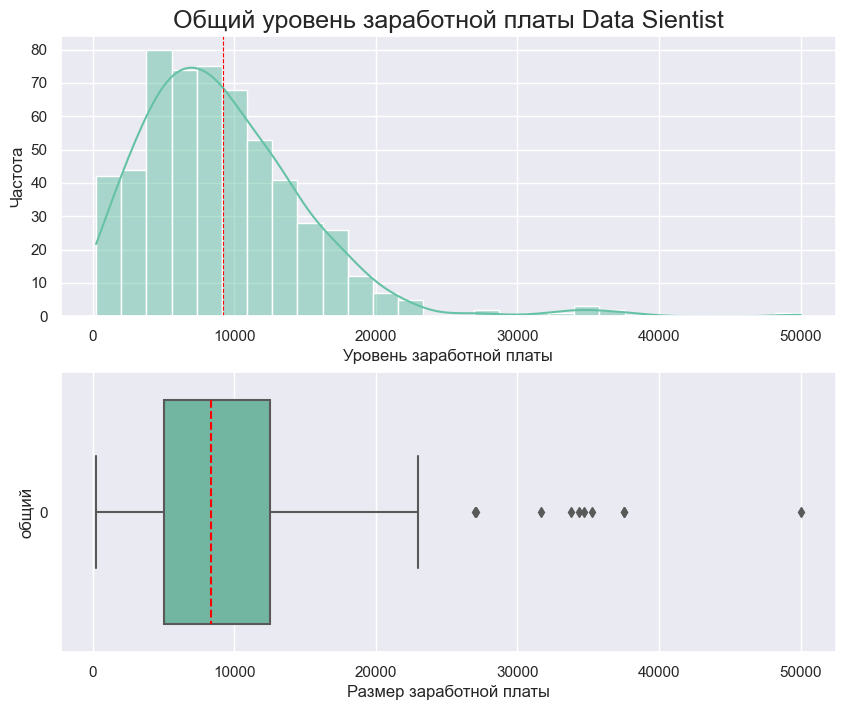

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df_salaries['monthly_salary'], kde=True, ax=axes[0])
axes[0].set(xlabel='Уровень заработной платы', ylabel='Частота')
axes[0].set_title('Общий уровень заработной платы Data Sientist', size=18)
axes[0].axvline(df_salaries['monthly_salary'].mean(), color='red',
                linestyle='--', linewidth=0.8)

sns.boxplot(df_salaries['monthly_salary'], ax=axes[1], orient='h',
            medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Размер заработной платы', ylabel='общий')
# axes[1].set_title('Общий уровень заработной платы Data Sientist')

plt.show()

На графике видно, что средний уровень зарплат варьируется 0 до 24000 долларов в месяц. График имеет вид нормального распределения с правосторонней ассиметрией. Межквартильный размах зарплаты между 25-й и 75-й квантилью находится в диапазоне от 7500  до 12000 долларов. 

На первом графике красной линие проведено среднее значение, на втором медианное. Они отличны друг от друга, что говорит о некотором отклонении от нормального распределения, это будет проверено в дальнейше на тестах. 

**Какие факторы влияют на заработную плату**❓

1. Общий признак **work_year** (год работы).

In [18]:
# Создаём таблицу по года с колличеством профессий в нашем DataFrame.
data = df_salaries['work_year'].value_counts().to_frame()
data.columns = ['Число профессий']
data

,Число профессий
2022,278
2021,215
2020,72


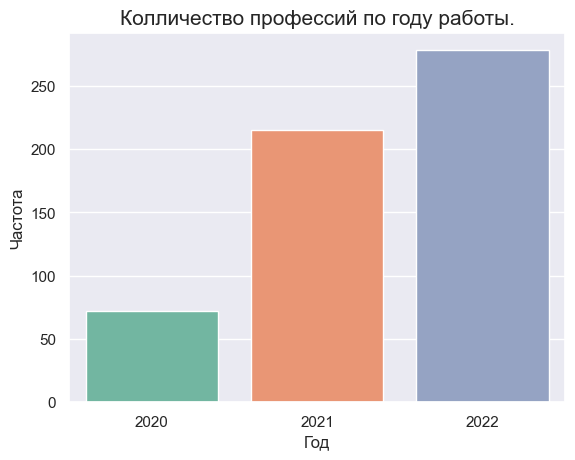

In [19]:
ax = sns.barplot(y=data['Число профессий'], x=data.index)
ax.set(xlabel='Год', ylabel='Частота')
ax.set_title('Колличество профессий по году работы.', size=15)
plt.show()

Построим график ежегодного рост зарплат у специалистов Data Scientist и узнаем если зависмость уровня зарплаты от года работы.

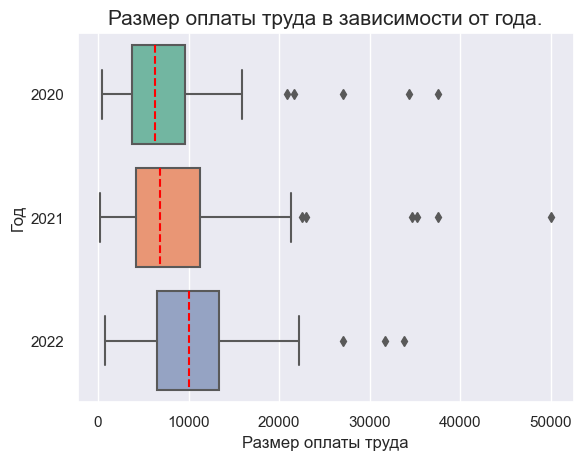

In [20]:
# Построим коробчатые диаграммы по годам
ax = sns.boxplot(df_salaries,  x='monthly_salary', y='work_year', orient='h',
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Год')
plt.title('Размер оплаты труда в зависимости от года.', size=15)
plt.show()

In [21]:
# Таблица заработной платы в зависимости от года работы.
table = df_salaries.groupby('work_year')[
    'monthly_salary'].describe().round()
print('Размер заработной платы в зависимости от года работы.')
table

Размер заработной платы в зависимости от года работы.


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,7984.0,6903.0,475.0,3810.0,6295.0,9627.0,37500.0
2021,215.0,8285.0,6692.0,238.0,4166.0,6877.0,11250.0,50000.0
2022,278.0,10257.0,4991.0,833.0,6565.0,10000.0,13333.0,33750.0


**Вывод:**
* средний уровень заработной платы из года в год увеличивается;
* снижается уровень *std* среднеквадратического отклонения, что говорит, что значение зарплаты имеет более устойчивое и стабильное положение;
* *work_year* влияет на уровень заработной платы специалиста Data Scientist. 

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.

2. Общий признак **remote_ratio** (процет удалённой работы).
Возможные значения:
    - 0 — удалённой работы нет (менее 20 %);
    - 50 — частично удалённая работа;
    - 100 — полностью удалённая работа (более 80 %).

In [22]:
# Построим DataFrame признака удалённой работы.
data = df_salaries['remote_ratio'].value_counts().to_frame()
data.sort_index(inplace=True)
data.columns = ['frequency']
data['доля в %'] = round((data['frequency']/data['frequency'].sum())*100)
data

,frequency,доля в %
0,121,21.0
50,98,17.0
100,346,61.0


Построим круговой и коробчатый графики. Первый график будет отражат какую долю занимает удалённая работа, а второй как меняется уровень зарплаты в зависимоти от уровня удалённой работы. 

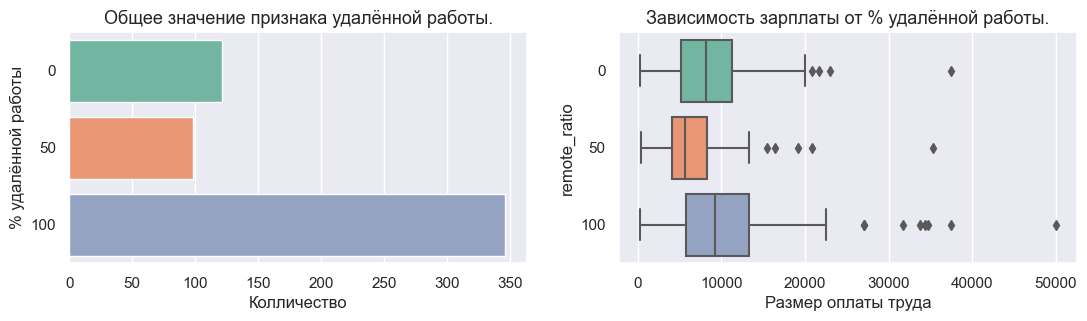

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.barplot(x=data['frequency'], y=data.index, orient='h', ax=axes[0])
axes[0].set_title('Общее значение признака удалённой работы.', size=13)
axes[0].set(xlabel='Колличество', ylabel='% удалённой работы')

sns.boxplot(df_salaries,  x='monthly_salary',
            y='remote_ratio', orient='h', ax=axes[1])
axes[1].set(xlabel='Размер оплаты труда')
axes[1].set_title('Зависимость зарплаты от % удалённой работы.', size=13)

plt.show()

In [24]:
# Таблица заработной платы в зависимости от удалённости работы.
table = df_salaries.groupby('remote_ratio')[
    'monthly_salary'].describe().round()
print('Размер заработной платы в зависимости от удалённости работы.')
table

Размер заработной платы в зависимости от удалённости работы.


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,121.0,8815.0,5699.0,238.0,5166.0,8179.0,11333.0,37500.0
50,98.0,6726.0,4803.0,450.0,4166.0,5667.0,8327.0,35250.0
100,346.0,10063.0,6244.0,333.0,5833.0,9226.0,13312.0,50000.0


**Вывод:**
- работа с уровнем удалённости в 100% занимает 1 место и долю в 61% от общего числа профессий Data Scentist;
- ЗП(заработная плата) с уровнем удалённой работы 100%, выше чем у других; 
- как признак *remote_ratio* влияет на уровень заработной платы специалиста Data Scientist.

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в дополнительном исследовании.

3. Общий признак **experience_level** (уровень опыта) влияет ли он на уровень заработной платы.

In [25]:
data = df_salaries['experience_level'].value_counts().to_frame()
data

,experience_level
SE,243
MI,208
EN,88
EX,26


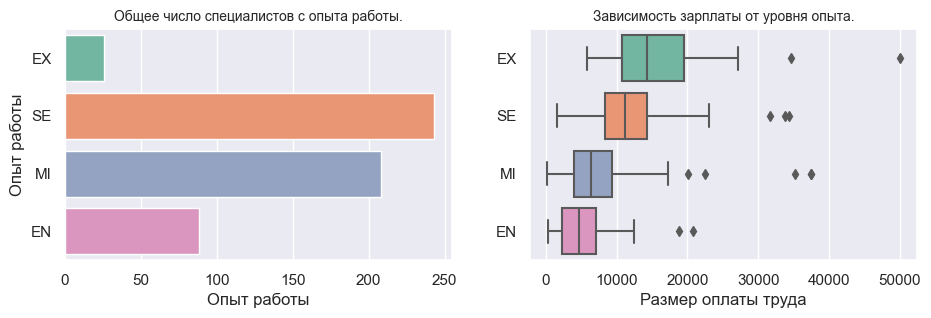

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

sns.barplot(x=data['experience_level'], y=data.index, ax=axes[0],
            order=['EX', 'SE', 'MI', 'EN'])
axes[0].set_title('Общее число специалистов с опыта работы.', size=10)
axes[0].set(xlabel='Опыт работы', ylabel='Опыт работы')

sns.boxplot(df_salaries,  x='monthly_salary', y='experience_level',
            orient='h', ax=axes[1], order=['EX', 'SE', 'MI', 'EN'])
axes[1].set(xlabel='Размер оплаты труда', ylabel=None)
axes[1].set_title('Зависимость зарплаты от уровня опыта.', size=10)

plt.show()

In [27]:
# Таблица заработной платы в зависимости от опыта работы.
table = df_salaries.groupby('experience_level')[
    'monthly_salary'].describe().round()
print('Размер заработной платы в зависимости от опыта работы.')
table

Размер заработной платы в зависимости от опыта работы.


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,5137.0,3700.0,333.0,2292.0,4708.0,7118.0,20833.0
EX,26.0,16616.0,9756.0,5811.0,10834.0,14286.0,19479.0,50000.0
MI,208.0,7316.0,5343.0,238.0,3930.0,6411.0,9339.0,37500.0
SE,243.0,11531.0,4996.0,1575.0,8294.0,11250.0,14323.0,34333.0


Значения на графике опыта работ: 
1. EN — Entry-level/Junior;
2. MI — Mid-level/Intermediate;
3. SE — Senior-level/Expert;
4. EX — Executive-level/Director.

**Вывод:**

* Наибольшую долю на рынке составляют специалисты  *Senior-level/Expert* и *Mid-level/Intermediate* соответсвенно.

* На графика видно уровень опыт оказывает значительное влияния на уровень заработной платы. Так например опыт работы SE(Expert) и EX(Director) оценивается 1,5-3 раза выше чем уровень EN(Junior) и MI(Intermediate).

* как признак *experience_level* влияет на уровень заработной платы специалиста Data Scientist. 

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в качестве дополнительного исследования.



4. Общий признак **job_title** влияет ли он на уровень заработной платы или нет.

In [28]:
df_salaries.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,16,10,10,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


Преобразуем наши данные для наглядности на графиках

In [29]:
df_1 = df_salaries['job_title'].value_counts()
df_1.rename('count', inplace=True)
df_1.index.name = 'job_title'

# Порядок профессий
prof = list(df_1.index)

df_2 = df_salaries.groupby('job_title')['monthly_salary'].quantile(0.5).round()
df_2 = df_2.rename('mean_salary')

data = pd.concat([df_1, df_2], axis=1)
data

,count,mean_salary
job_title,,
Data Scientist,130,8333.0
Data Engineer,121,8400.0
other,97,8166.0
Data Analyst,82,7500.0
Machine Learning Engineer,39,7285.0
Research Scientist,16,6355.0
Data Science Manager,12,12979.0
Data Architect,11,15000.0
Machine Learning Scientist,8,13042.0


Таблице выше показывает количество специальностей на рынке и среднее значение заработной платы. 

Изобразим это на графиках.

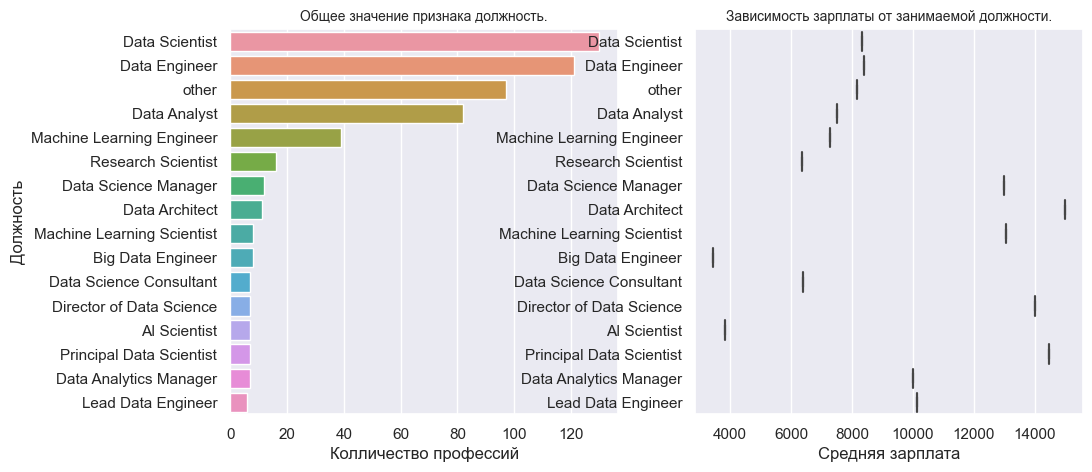

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

sns.barplot(data, x=data['count'], y=data.index, ax=axes[0])
axes[0].set_title('Общее значение признака должность.', size=10)
axes[0].set(xlabel='Колличество профессий', ylabel='Должность')

sns.boxplot(data,  x=data['mean_salary'],
            y=data.index, ax=axes[1])

axes[1].set_title('Зависимость зарплаты от занимаемой должности.', size=10)
axes[1].set(xlabel='Средняя зарплата', ylabel=None)

plt.show()

In [31]:
# Таблица заработной платы в зависимости от занимаемой должности.
table = df_salaries.groupby('job_title')[
    'monthly_salary'].describe().round()
print('Размер заработной платы в зависимости от занимаемой должности.')
table

Размер заработной платы в зависимости от занимаемой должности.


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
AI Scientist,7.0,5511.0,5846.0,1000.0,1252.0,3824.0,7292.0,16666.0
Big Data Engineer,8.0,4331.0,3579.0,490.0,1463.0,3442.0,6646.0,9503.0
Data Analyst,82.0,7507.0,3391.0,506.0,5027.0,7500.0,9676.0,16666.0
Data Analytics Manager,7.0,10594.0,1488.0,8783.0,9553.0,10000.0,11874.0,12521.0
Data Architect,11.0,14823.0,3810.0,7558.0,12408.0,15000.0,16722.0,22200.0
Data Engineer,121.0,9145.0,4850.0,333.0,5501.0,8400.0,12500.0,27000.0
Data Science Consultant,7.0,5785.0,2580.0,475.0,5565.0,6402.0,6951.0,8583.0
Data Science Manager,12.0,13194.0,4383.0,4507.0,11857.0,12979.0,14838.0,20083.0
Data Scientist,130.0,8611.0,5331.0,238.0,4194.0,8333.0,11700.0,34333.0


**Вывод:**

* самые распространённые профессии *Data Science*, *Data Engineer*, *Data Analyst* получают зарплату  в районе 8000 долларов;
* самая высокая средяя заработная плата 13000 у *DataArchitect*,
* самая маленькая 3800 у *Big Data Engeneer*;
* *job_title* влияет на уровень заработной платы.

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.


5. Общий признак **company_size** (размер компании) влияет ли он на уровень заработной платы или нет.

* *S* - менее 50 сотрудников (небольшая компания);
* *M* - от 50 до 250 сотрудников (средняя компания);
* *L* - более 250 сотрудников (крупная компания)

Посмотрим данные признака *company_size*.

In [32]:
df_salaries['company_size'].describe(include='object').to_frame()

,company_size
count,565
unique,3
top,M
freq,290


Общее число компаний 565, самые распространённые M - средние компании с числом сотрудников от 50 до 250 человек.

In [33]:
data = df_salaries['company_size'].value_counts().to_frame()
data

,company_size
M,290
L,193
S,82


Покажем данные на графике.

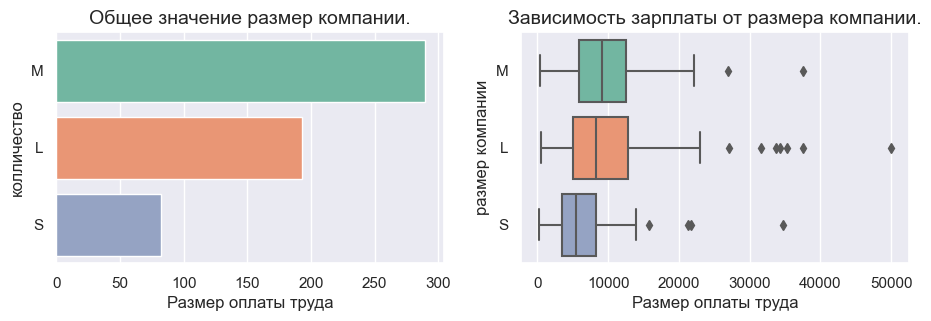

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

sns.barplot(y=data.index, x=data['company_size'],
            orient='h', ax=axes[0])
axes[0].set_title('Общее значение размер компании.', size=14)
axes[0].set(xlabel='Размер оплаты труда', ylabel='колличество')

sns.boxplot(df_salaries.sort_values('company_size', ascending=True),  x='monthly_salary',
            y='company_size', orient='h', ax=axes[1],
            order=['M', 'L', 'S'])
axes[1].set(xlabel='Размер оплаты труда', ylabel='размер компании')
axes[1].set_title('Зависимость зарплаты от размера компании.', size=14)

plt.show()

In [35]:
# Таблица заработной платы в зависимости от размера компании.
table = df_salaries.groupby('company_size')[
    'monthly_salary'].describe().round()
print('Размер заработной платы в зависимости от размера компании.')
table

Размер заработной платы в зависимости от размера компании.


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,193.0,9851.0,7230.0,490.0,5000.0,8333.0,12805.0,50000.0
M,290.0,9567.0,5065.0,333.0,5902.0,9136.0,12517.0,37500.0
S,82.0,6489.0,5318.0,238.0,3484.0,5458.0,8333.0,34666.0


**Вывод:**

* На графиках видно, что у маленьких компаний диапазон зарплат ниже чем, у средних и больших. Возможно потому, что они не могут позволить себе иметь большой штат специалистов в силу объёма работ, а так же возможности нести расходы.

* Размер компании слабо, но влияет на зарплату сотрудников, особенно хорошо видны различия в малньких компаниях. 

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.


6. Общий признак **company_location** (расположение главного офиса компании) влияет ли он на уровень заработной платы или нет.

Посмотрим данные признака *company_location*.

In [36]:
df_salaries['company_location'].describe(include='object').to_frame()

,company_location
count,565
unique,10
top,US
freq,318


Больше всего компаний находятся в US. Всего 10 уникальных значений. 

In [37]:
data = df_salaries['company_location'].value_counts().to_frame()
# Список стран компаний
locations = list(data.index)
data

,company_location
US,318
other,77
GB,46
CA,28
DE,27
IN,24
FR,15
ES,14
GR,10
JP,6


Компании с именем *other* имеют 1-2 комании, мы объединили для удобства визулизации.

Построим графики.

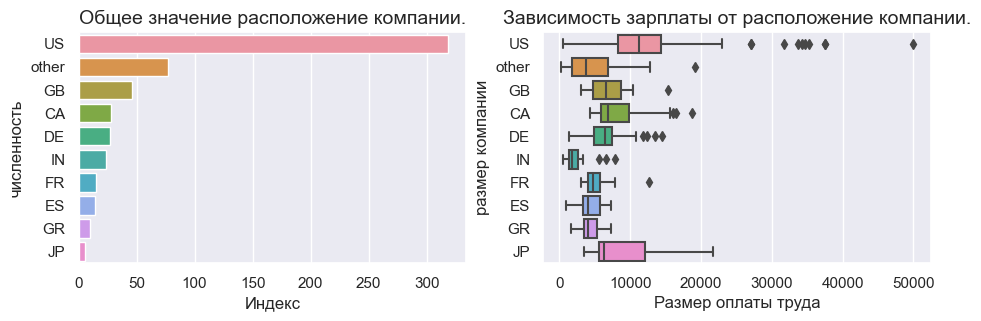

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

sns.barplot(y=data.index, x=data['company_location'],
            orient='h', ax=axes[0])
axes[0].set_title('Общее значение расположение компании.', size=14)
axes[0].set(xlabel='Индекс', ylabel='численность')

sns.boxplot(df_salaries.sort_values('company_location', ascending=True),
            x='monthly_salary', y='company_location', orient='h', ax=axes[1],
            order=locations)
axes[1].set(xlabel='Размер оплаты труда', ylabel='размер компании')
axes[1].set_title('Зависимость зарплаты от расположение компании.', size=14)

plt.show()

In [39]:
# Таблица заработной платы в разрзе места расположения компании.
table = df_salaries.groupby('company_location')[
    'monthly_salary'].describe().round()
print('Размер заработной платы в зависимости от размера компании.')
table

Размер заработной платы в зависимости от размера компании.


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
CA,28.0,8343.0,3923.0,4333.0,5876.0,6824.0,9780.0,18750.0
DE,27.0,6796.0,3325.0,1330.0,4888.0,6402.0,7474.0,14480.0
ES,14.0,4421.0,1758.0,862.0,3339.0,4030.0,5732.0,7327.0
FR,15.0,5330.0,2390.0,3053.0,4016.0,4728.0,5761.0,12666.0
GB,46.0,6804.0,2487.0,3108.0,4743.0,6543.0,8693.0,15269.0
GR,10.0,4335.0,1696.0,1666.0,3428.0,4056.0,5266.0,7327.0
IN,24.0,2381.0,1891.0,450.0,1394.0,1844.0,2680.0,7888.0
JP,6.0,9510.0,6965.0,3474.0,5523.0,6306.0,12112.0,21666.0
US,318.0,12024.0,6044.0,473.0,8333.0,11250.0,14416.0,50000.0


**Вывод:**

* Расположения компании влияют на уровень заработной платы сотрудников. 

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.

### Дадим графичские ответы на поставленые вопросы

1. Наблюдается ли рост зарплат у специалистов *Data Scientist* за каждый год?
2. Как соотносятся зарплаты *Data Scientist* и *Data Engineer* в 2022 году?
3. Как соотносятся зарплаты специалистов *Data Scientist* и *Data Engineer* в компаниях различных размеров?
4. Есть ли связь между наличием должностей *Data Scientist* и *Data Engineer* и размером компании?

### Вопрос 1. Наблюдается ли рост зарплат у специалистов *Data Scientist* за каждый год?

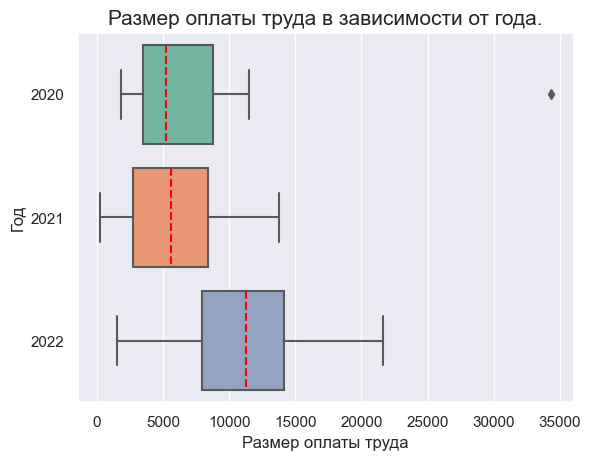

In [40]:
# Отфильтруем только значения для Data Scientist.
ds = df_salaries[df_salaries['job_title'] == 'Data Scientist']

# Построим коробчатые диаграммы по годам
ax = sns.boxplot(ds,  x='monthly_salary', y='work_year', orient='h',
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Год')
plt.title('Размер оплаты труда в зависимости от года.', size=15)
plt.show()

In [41]:
ds.groupby('work_year')['monthly_salary'].describe().round()

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,7164.0,6786.0,1805.0,3516.0,5227.0,8750.0,34333.0
2021,44.0,5851.0,3820.0,238.0,2732.0,5602.0,8410.0,13750.0
2022,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


**Вывод:** рост заработной платы специалиста Data Scientist наблюдается только с 2021 по 2022 год. Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.

### Вопрос 2. Как соотносятся зарплаты *Data Scientist* и *Data Engineer* в 2022 году?

In [42]:
# Отфильтруем нужные данные
de_ds_22 = df_salaries.loc[(df_salaries['work_year'] == 2022), [
    'monthly_salary', 'work_year', 'job_title']]

de_ds_22 = de_ds_22.loc[(de_ds_22['job_title'] == 'Data Engineer') |
                        (de_ds_22['job_title'] == 'Data Scientist')]

de_ds_22

,monthly_salary,work_year,job_title
289,11250,2022,Data Engineer
292,10833,2022,Data Scientist
293,7500,2022,Data Scientist
294,14166,2022,Data Engineer
295,12500,2022,Data Engineer
...,...,...,...
593,12500,2022,Data Scientist
598,13333,2022,Data Scientist
599,10833,2022,Data Scientist
602,12833,2022,Data Engineer


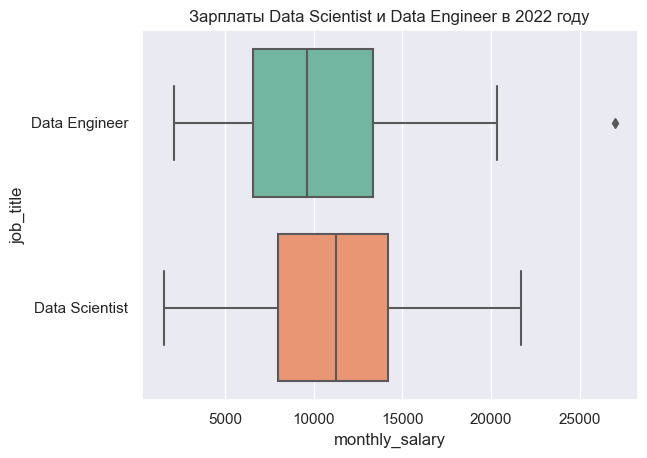

In [43]:
#  Построим график
boxplot = sns.boxplot(
    de_ds_22, x=de_ds_22['monthly_salary'], y=de_ds_22['job_title'])
plt.title('Зарплаты Data Scientist и Data Engineer в 2022 году')
plt.show()

In [44]:
print('Зарплаты Data Scientist и Data Engineer в 2022 году.')
de_ds_22.groupby('job_title')['monthly_salary'].describe().round()

Зарплаты Data Scientist и Data Engineer в 2022 году.


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,10387.0,4821.0,2083.0,6543.0,9583.0,13336.0,27000.0
Data Scientist,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


**Вывод:** зарплаты *Data Scientist* в 2022 году, больше чем у *Data Engineer*.  Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.

### Вопрос 3. Как соотносятся зарплаты специалистов *Data Scientist* и *Data Engineer* в компаниях различных размеров?

In [45]:
# Отфильтруем нужные данные
de_ds_comp_size = df_salaries.loc[(df_salaries['job_title'] == 'Data Engineer') | (
    df_salaries['job_title'] == 'Data Scientist'), ['monthly_salary', 'company_size', 'job_title', 'work_year']]

de_ds_comp_size

,monthly_salary,company_size,job_title,work_year
0,6652,L,Data Scientist,2020
7,2977,L,Data Scientist,2020
10,4276,S,Data Scientist,2020
11,3373,L,Data Scientist,2020
12,3326,M,Data Scientist,2020
...,...,...,...,...
593,12500,M,Data Scientist,2022
598,13333,M,Data Scientist,2022
599,10833,M,Data Scientist,2022
602,12833,M,Data Engineer,2022


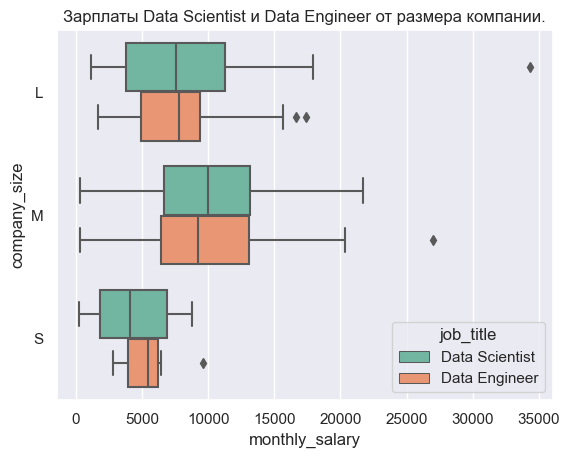

In [46]:
#  Построим график
boxtplot = sns.boxplot(de_ds_comp_size, x=de_ds_comp_size['monthly_salary'],
                       y=de_ds_comp_size['company_size'], hue='job_title',
                       order=['L', 'M', 'S'])
plt.title('Зарплаты Data Scientist и Data Engineer от размера компании.')
plt.show()

In [47]:
print('Зарплаты Data Scientist и Data Engineer от размера компании.')
de_ds_comp_size.groupby(['company_size', 'job_title'])[
    'monthly_salary'].describe().round()

Зарплаты Data Scientist и Data Engineer от размера компании.


count     mean     std     min     25%     50%  \
company_size job_title                                                        
L            Data Engineer    34.0   8073.0  4334.0  1666.0  4887.0  7762.0   
             Data Scientist   43.0   8562.0  6105.0  1116.0  3770.0  7561.0   
M            Data Engineer    81.0   9864.0  5019.0   333.0  6411.0  9208.0   
             Data Scientist   66.0  10006.0  4696.0   333.0  6666.0  9960.0   
S            Data Engineer     6.0   5528.0  2405.0  2792.0  3960.0  5458.0   
             Data Scientist   21.0   4327.0  2768.0   238.0  1805.0  4105.0   

                                 75%      max  
company_size job_title                         
L            Data Engineer    9414.0  17425.0  
             Data Scientist  11250.0  34333.0  
M            Data Engineer   13050.0  27000.0  
             Data Scientist  13125.0  21666.0  
S            Data Engineer    6177.0   9583.0  
             Data Scientist   6875.0   8750.0

**Вывод:**
- зарплаты *Data Scientist* и *Data Engineer* от размера компании различаются. Средний размер зарплаты в компаниях размера *M* выше чем в других, a зарплата специалистов в разных по размеру компаниях приблизительно одинаковая.  Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.

### 4. Есть ли связь между наличием должностей *Data Scientist* и *Data Engineer* и размером компании?

Найдём коэффициет кореляции и построим графики.

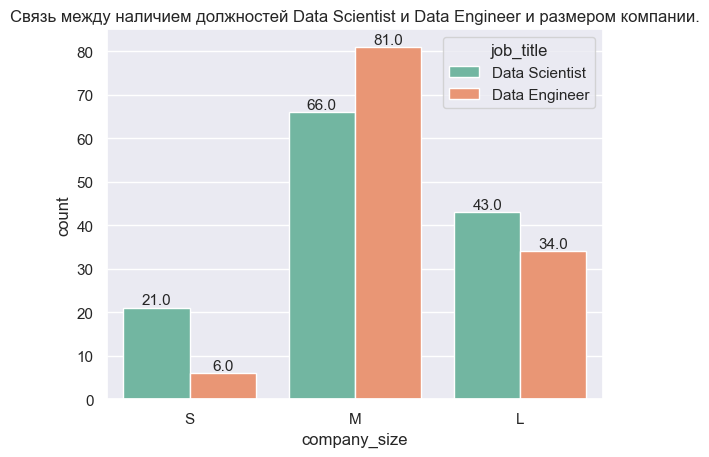

In [48]:
ax = sns.countplot(de_ds_comp_size, x=de_ds_comp_size['company_size'],
                   hue='job_title', order=['S', 'M', 'L'])
plt.title('Cвязь между наличием должностей Data Scientist и Data Engineer и размером компании.')
# Для отображения значений на графике.
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,
            rect.get_height(), horizontalalignment='center', fontsize=11)

plt.show()

In [49]:
crosstab = pd.crosstab(
    de_ds_comp_size['company_size'], de_ds_comp_size['job_title'])
crosstab['DE/DS соотношение'] = round(
    crosstab['Data Engineer']/crosstab['Data Scientist'], 2)
crosstab

job_title,Data Engineer,Data Scientist,DE/DS соотношение
company_size,,,
L,34,43,0.79
M,81,66,1.23
S,6,21,0.29


**Вывод:** 
- для больших компаний DE(Data Engineer) < DS(Data Scientist);
- для средних компаний DE > DS;
- для маленьких компаний DE < DS.

Для того чтобы проверить являются ли эти различия статестически значимы, проведём статестическое тестирование в следующем разделе.

### II.2. Статистический анализ данных

Для статестического анализа напишим три функции:

1. Функция <font color='green'><i>decision_normality()</i></font> - проверяет данные на нормальность  и делает вывод, данные распределены нормально или нет.

2. Функция <font color='green'><i>decision_variance()</i></font> проверяет данные на равенство дисперсий и делает вывод, дисперсии равны или нет.

3. Функция <font color='green'><i>decision_hypothesis()</i></font> - проверяет данные по гипотизе и делает вывод, существует зависимость между признаками или нет, т.е. принимаем альтернативную или отклоняем.

In [50]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('''p-значение меньше, чем заданный уровень значимости {:.2f}.
            Распределение отлично от нормального'''.format(alpha))
    else:
        print('''p-значение больше, чем заданный уровень значимости {:.2f}
            Распределение является нормальным'''.format(alpha))

# функция для принятия решений о равенстве дисперсий


def decision_variance(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('''Дисперсии не одинаковы.''')
    else:
        print('''Дисперсии одинаковы.''')

# функция для принятия решения об отклонении нулевой гипотезы


def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('''p-значение меньше, чем заданный уровень значимости {:.2f}.
            Отвергаем нулевую гипотезу в пользу альтернативной.'''
              .format(alpha))
    else:
        print('''p-значение больше, чем заданный уровень значимости {:.2f}.
            У нас нет оснований отвергнуть нулевую гипотезу.'''.format(alpha))

Сформулируем гипотизы на вопросы и проведём статестическое тестирование:

#### **Вопрос 1**. Наблюдается ли ежегодный рост зарплат у специалистов *Data Scientist*?


In [51]:
# Отфильтруем только значения для Data Scientist.
ds = df_salaries[df_salaries['job_title'] == 'Data Scientist']

ds_agg = ds.groupby('work_year')['monthly_salary'].describe().round()
print('Опистельная таблица заработной платы Data Scientista по годам.')
ds_agg

Опистельная таблица заработной платы Data Scientista по годам.


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,7164.0,6786.0,1805.0,3516.0,5227.0,8750.0,34333.0
2021,44.0,5851.0,3820.0,238.0,2732.0,5602.0,8410.0,13750.0
2022,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


Из имеющихся данных мы видим, что в столбце **count** за 2020 год всего 21 значение, тогда как за 2022год 65 значений. Если вырованять по годам число значений, а недостатющие заполнить средним, то при ипользовании тестов для 2х или 3х групп мы получим некоректный вывод по гипотизе. Следовательно мы используем тесты для одной группы и сравним со средним значением заработной платы к предыдущему году.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы в 2021 ($μ_1$) статистически меньше либо равен среднему размеру заработной платы в 2020 = 7164 долларов.

$ H_0 : μ_1 <= 7164 $

*Альтернативная гипотеза* ($H_1$): размер заработной платы в 2021 ($μ_1$) статистически больше среднего размера заработной платы в 2021 = 7164 долларов.

$ H_1 : μ_1 > 7164 $

Такая гипотиза будет проверяться между средним размером заработной платы в 2021 и выборкой за 2022 год. 

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [52]:
# Зададим уровень с которым будем сравнивать
salary_20_m = ds_agg['mean'].iloc[0]
salary_21_m = ds_agg['mean'].iloc[1]

# Создадим выборку зарплат по годам для Data Scientist
salary_21 = ds[ds['work_year'] == 2021]['monthly_salary']
salary_22 = ds[ds['work_year'] == 2022]['monthly_salary']

# Проводим тест Шапиро-Уилка на нормальность распределения по годам.
print('Для 2021:')
result = stats.shapiro(salary_21)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_22)
decision_normality(result[1])

Для 2021:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05
            Распределение является нормальным
Для 2022:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05
            Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «monthly_salary»? — Количественный.
* Сколько сравниваемых групп? — Одна.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да.

Чтобы проверить нашу гипотезу, можно использовать *одновыборочный тест t-критерий* для сравнения распределений с заданым уровнем.

**Проведём тест**



In [53]:
# проводим тест
_, p = stats.ttest_1samp(salary_21, popmean=salary_20_m, alternative='greater')
print('2021:')
decision_hypothesis(p)

_, p = stats.ttest_1samp(salary_22, popmean=salary_21_m, alternative='greater')
print('2022:')
decision_hypothesis(p)

2021:
p-value = 0.986
p-значение больше, чем заданный уровень значимости 0.05.
            У нас нет оснований отвергнуть нулевую гипотезу.
2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод по 1-му вопросу:** 
* заработная плата Data Scientist в 2021 году по сравнению с средним значением в 2020 годом не измениласть;
* заработная плата Data Scientist в 2022 больше, чем с среднияя ЗП в 2021 году;
* ежегодного роста зарплат у специалистов *Data Scientist* не происходит.

#### **Вопрос 2**. Как соотносятся зарплаты *Data Scientist* и *Data Engineer* в 2022 году?

In [54]:
# Создадим таблицу по ЗП Data Scientist и Data Engineer за 2022 год.
de_ds_22 = df_salaries[((df_salaries['job_title'] == 'Data Scientist')
                       |(df_salaries['job_title'] == 'Data Engineer'))
                       &(df_salaries['work_year'] == 2022)]

de_ds_22_agg =  de_ds_22.groupby('job_title')['monthly_salary'].describe().round()
print('Значения ЗП за 2022 год:')
de_ds_22_agg

Значения ЗП за 2022 год:


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,10387.0,4821.0,2083.0,6543.0,9583.0,13336.0,27000.0
Data Scientist,65.0,10947.0,4649.0,1536.0,7962.0,11250.0,14166.0,21666.0


Выборка данных по ЗП *Data Scientist* и *Data Engineer* различны. Выравняем данные дополнив их средним значением.

In [55]:
a = de_ds_22[de_ds_22['job_title']=='Data Engineer']['monthly_salary']
b = de_ds_22[de_ds_22['job_title']=='Data Scientist']['monthly_salary']

a.name='DE_salary'
b.name='DS_salary'

a.reset_index(drop=True,inplace=True)
b.reset_index(drop=True,inplace=True)

concat_table = pd.concat([a,b],axis=1)
values = {'DS_salary':concat_table['DS_salary'].mean().round()}
concat_table=concat_table.fillna(values)
concat_table

,DE_salary,DS_salary
0,11250,10833.0
1,14166,7500.0
2,12500,11385.0
3,4362,8280.0
4,20166,9815.0
...,...,...
74,2083,10947.0
75,18342,10947.0
76,13340,10947.0
77,12833,10947.0


Теперь у  нас есть одинаковая выбока данных по зарплате *Data Scientist* и *Data Engineer* в 2022 году. 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП *Data Scientist*($μ_1$) и *Data Engineer*($μ_2$) в 2022 году статистически равны друг другу.

$ H_0 : μ_1 = μ_2 $

*Альтернативная гипотеза* ($H_1$): ЗП *Data Scientist*($μ_1$) и *Data Engineer*($μ_2$) в 2022 году статистически не равны друг другу.

$ H_1 : μ_1 \neq  μ_2 $

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [56]:
# Проводим тест Шапиро-Уилка на нормальность распределения по годам.
print('ЗП Data Engineer в 22:')
result = stats.shapiro(concat_table['DE_salary'])
decision_normality(result[1])

print('ЗП Data Scientist в 22:')
result = stats.shapiro(concat_table['DS_salary'])
decision_normality(result[1])

ЗП Data Engineer в 22:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
ЗП Data Scientist в 22:
p-value = 0.205
p-значение больше, чем заданный уровень значимости 0.05
            Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер заработной платы»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.
* Дисперсии равны или нет? т.к. признак распределён не по нормальному закону, нет смысла сравнивать дисперсии.

Чтобы проверить нашу гипотезу, можно использовать непараметричский тест U-критерий Манна-Уитни библиотеки *scipy.stats.mannwhitneyu*.

**Проведём тест**

In [57]:
# проводим тест
_, p = stats.mannwhitneyu(
    concat_table['DE_salary'], concat_table['DS_salary'], alternative='two-sided')
print('ЗП Data Scientist и Data Engineer в 2022 году:')
decision_hypothesis(p)

ЗП Data Scientist и Data Engineer в 2022 году:
p-value = 0.258
p-значение больше, чем заданный уровень значимости 0.05.
            У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод по 2-му вопросу:** 
* заработная плата Data Scientist и *Data Engineer* в 2022 году статестически равны.

#### **Вопрос 3**. Как соотносятся зарплаты специалистов *Data Scientist* и *Data Engineer* в компаниях различных размеров?

Типы компаний по размеру:
* S — менее 50 сотрудников (небольшая компания);
* M — от 50 до 250 сотрудников (средняя компания);
* L — более 250 сотрудников (крупная компания)

Предварительно графически мы выяснили, ЗП *Data Scientist* и *Data Engineer* в компаниях различных размеров отличаются, проведём тест на статестичскую значимость нашей гипотизы.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП *Data Scientist* и *Data Engineer* в компаниях различных размеров статистически равны друг другу, где $μ_1$ - S (небольшая компания), $μ_2$ - M (средняя компания) и  $μ_3$ - L (крупная компания)

$ H_0 : μ_1 = μ_2 = μ_3 $

*Альтернативная гипотеза* ($H_1$): ЗП *Data Scientist* и *Data Engineer* в компаниях различных размеров статистически не равны друг другу.

$ H_1 : μ_1 \neq  μ_2 \neq  μ_3 $


In [58]:
print('Всего значений ЗП Data Scientist и Data Engineer:')
de_ds_comp_size['company_size'].value_counts()

Всего значений ЗП Data Scientist и Data Engineer:


M    147
L     77
S     27
Name: company_size, dtype: int64

In [59]:
ds = de_ds_comp_size[de_ds_comp_size['job_title'] == 'Data Scientist']

print(f'''Число значений ЗП Data Scientist от размера компании:
{ds['company_size'].value_counts()}\n''')

de = de_ds_comp_size[de_ds_comp_size['job_title'] == 'Data Engineer']

print(f'''Число значений ЗП Data Engineer от размера компании:
{de['company_size'].value_counts()}''')

Число значений ЗП Data Scientist от размера компании:
M    66
L    43
S    21
Name: company_size, dtype: int64

Число значений ЗП Data Engineer от размера компании:
M    81
L    34
S     6
Name: company_size, dtype: int64


Так как вариации ЗП у *Data Engineer* в малых компаниях *S* числено мала мы будем и игнорировать её проводя статестический анализ и будем рассматривать соотношение только для компаний с размером *М* и *L*.

Заполним недостоющие данные и приведём к общему максимальному значению по выборке. Для Data Scientist max_ds = 66, для Data Engineer max_de = 81.  Напишем функицию **increase_sample** *наращивание выборки через интерполяцию* и применим её.

In [60]:
def increase_sample(data, n, vis=False):
    """Наращивание выборки через интерполяцию.

    Args:
        data (_list_): начальный список значений
        n (_int_): число значений к которому нужно прийти
        vis (_bool_): визуализации, по умолчанию нет
    Returns:
        _array_: _увеличеный список значений_
    """
    # шкала по размеру желаемого кол-ва наблюдений
    x = list(range(n))

    # шкала по размеру имеющегося кол-ва наблюдений
    xp = np.linspace(0, n-1, num=len(data))

    # данные и метод
    fp = data
    data_interp = np.interp(x, xp, fp)

    # визуализация
    if vis:
        plt.scatter(x, data_interp)  # новые точки на графике
        plt.scatter(xp, data)        # старые точки на графике
        
    return data_interp

Для наглядности как измениться выборка для ЗП Data Scientist
с размером компании L. Оранжевые точки значения - до, зелёные - добавочные.


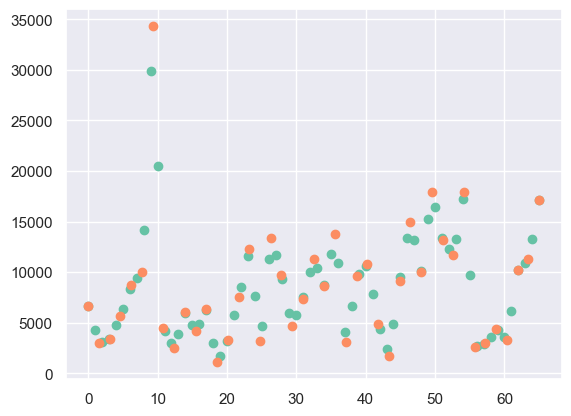

In [61]:
# Для Data Scientist

# Вариация значений по ЗП от размера компаний.
ds_M = list(ds['monthly_salary'][ds['company_size'] == 'M'])
ds_L = list(ds['monthly_salary'][ds['company_size'] == 'L'])
ds_S = list(ds['monthly_salary'][ds['company_size'] == 'S'])

de_M = list(de['monthly_salary'][de['company_size'] == 'M'])
de_L = list(de['monthly_salary'][de['company_size'] == 'L'])

# желаемое число наблюдений
max_ds = 66
max_de = 81

print(f'''Для наглядности как измениться выборка для ЗП Data Scientist
с размером компании L. Оранжевые точки значения - до, зелёные - добавочные.''')
inc_ds_L = increase_sample(ds_L, max_ds, vis=True).astype(int)
inc_ds_S = increase_sample(ds_S, max_ds).astype(int)
inc_de_L = increase_sample(de_L, max_de).astype(int)

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [62]:
# Проводим тест Шапиро-Уилка на нормальность распределения.
print('Для ЗП Data Scientis:')
print('M:')
result = stats.shapiro(ds_M)
decision_normality(result[1])
print('L:')
result = stats.shapiro(inc_ds_L)
decision_normality(result[1])
print('S:')
result = stats.shapiro(inc_ds_S)
decision_normality(result[1])


print('\nДля ЗП Data Engineer')
print('M:')
result = stats.shapiro(de_M)
decision_normality(result[1])
print('L:')
result = stats.shapiro(inc_de_L)
decision_normality(result[1])

Для ЗП Data Scientis:
M:
p-value = 0.896
p-значение больше, чем заданный уровень значимости 0.05
            Распределение является нормальным
L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
S:
p-value = 0.047
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального

Для ЗП Data Engineer
M:
p-value = 0.085
p-значение больше, чем заданный уровень значимости 0.05
            Распределение является нормальным
L:
p-value = 0.016
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы.

*Data Scientist*:
* Какой тип у признака «monthly_salary»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Крассела Уолиса.

*Data Engineer*:
* Какой тип у признака «monthly_salary»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [63]:
# проводим тест
_, p = stats.kruskal(inc_ds_L, ds_M, inc_ds_S)
print('Data Scientist в компаниях с размером M и L, и S:')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(de_M, inc_de_L, alternative='two-sided')
print('\nData Engineer в компаниях с размером M и L:')
decision_hypothesis(p)

Data Scientist в компаниях с размером M и L, и S:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.

Data Engineer в компаниях с размером M и L:
p-value = 0.030
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод по 3-му вопросу:**
* Размер компании влияет на заработную плату *Data Scientist* и *Data Engineer*.


#### **Вопрос 4**. Есть ли связь между наличием должностей *Data Scientist* и *Data Engineer* и размером компании?

In [64]:
de_ds_comp_size

,monthly_salary,company_size,job_title,work_year
0,6652,L,Data Scientist,2020
7,2977,L,Data Scientist,2020
10,4276,S,Data Scientist,2020
11,3373,L,Data Scientist,2020
12,3326,M,Data Scientist,2020
...,...,...,...,...
593,12500,M,Data Scientist,2022
598,13333,M,Data Scientist,2022
599,10833,M,Data Scientist,2022
602,12833,M,Data Engineer,2022


Выведим наличие должностей в зависимости о размера компании.

In [65]:
a = de_ds_comp_size.groupby(by='job_title')[
    'company_size'].value_counts().to_frame()
a

company_size
job_title      company_size              
Data Engineer  M                       81
               L                       34
               S                        6
Data Scientist M                       66
               L                       43
               S                       21

**Вывод по 4-му вопросу**: 
* Мы не можем провести статестический анализ между наличием должностей *Data Scientist* и *Data Engineer* и размером компании, для этого нехватает данных. У нас есть информация за 3 года, мы можем разбить и построить таблицу как изменялось соотношение специальностей в разных по размеру компаниях, но этого будет мало, чтобы сделать какой либо статестически обоснованный вывод.

#### **Дополнительное исследование:**
**Вопрос 5.** Есть ли зависимось уровня заработной платы специалиста *Data Scientist* в  зависимости от опыта работ (занимаемой должности)? 

Значения уровней *опыта работ*: 
1. EN — Entry-level/Junior (начальный);
2. MI — Mid-level/Intermediate (средний);
3. SE — Senior-level/Expert (эксперт);
4. EX — Executive-level/Director (директор).

Предварительно графически мы выяснили,что ЗП *Data Scientist* в зависимости от опыта работ с каждым уровнем выше, проведём тест на статестичскую значимость нашей гипотизы.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП *Data Scientist* в зависимости от уровня опыта работы не отличается, где $μ_1$ - EN (Entry-level), $μ_2$ - MI (Mid-level) и  $μ_3$ - SE (Senior-level), $μ_4$ - EX (Executive-level).

$ H_0 : μ_1 = μ_2 = μ_3 $

*Альтернативная гипотеза* ($H_1$): ЗП *Data Scientist* в зависимости от уровня опыта работы статистически не равны друг другу, т.е. каждый следующий уровень выше другого.

$ H_1 : μ_1 <  μ_2 < μ_3 < μ_4 $

Сделаем необходимую выборку, где:

- *en* - список значений ЗП, для начального уровня;
- *mi* - список значений ЗП, для среднего уровня;
- *se* - список значений ЗП, для экспертного уровня.
- *ex* - список значений ЗП, для уровня директор.

In [66]:
# Сделаем необходимую выборку.
en = list(df_salaries[df_salaries['experience_level']
          == 'EN'].loc[:, 'monthly_salary'])
mi = list(df_salaries[df_salaries['experience_level']
          == 'MI'].loc[:, 'monthly_salary'])
se = list(df_salaries[df_salaries['experience_level']
          == 'SE'].loc[:, 'monthly_salary'])
ex = list(df_salaries[df_salaries['experience_level']
          == 'EX'].loc[:, 'monthly_salary'])

Рассмотрим сгруппированую таблицу по уровню опыта работы 

In [67]:
table = df_salaries.groupby('experience_level')[
    'monthly_salary'].describe().astype('int')
table

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88,5136,3699,333,2291,4708,7118,20833
EX,26,16615,9756,5811,10833,14286,19478,50000
MI,208,7315,5343,238,3930,6411,9339,37500
SE,243,11530,4996,1575,8294,11250,14323,34333


В таблице выше в столбце **count** показано число профессий всех уровней, он отличны друг от друга. У группы SE в столбце *count* наибольшее число значение. Воспользуемся функицией **increase_sample** *наращивание выборки через интерполяцию* и выравняем значение к max = 243.

In [68]:
# n - необходимое число примеров
n = 243
en_inc = increase_sample(en, n)
print(f'теперь EN = {len(en_inc)}')
mi_inc = increase_sample(mi, n)
print(f'теперь MI = {len(mi_inc)}')
ex_inc = increase_sample(ex, n)
print(f'теперь EX = {len(ex_inc)}')

теперь EN = 243
теперь MI = 243
теперь EX = 243


Теперь размер выборки у каждого уровня опыт одинаковый как у наибольшего SE из них.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [69]:
# Проводим тест Шапиро-Уилка на нормальность распределения.
print('EN:')
result = stats.shapiro(en_inc)
decision_normality(result[1])

print('MI:')
result = stats.shapiro(mi_inc)
decision_normality(result[1])

print('SE:')
result = stats.shapiro(se)
decision_normality(result[1])

print('EX:')
result = stats.shapiro(ex_inc)
decision_normality(result[1])

EN:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
MI:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
SE:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
EX:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для всех уровней *experience_level* значения одинаковы:
* Какой тип у признака «monthly_salary»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [70]:
# Сравним EN(начльный) с MI(средним) уровнем.
_, p = stats.mannwhitneyu(en_inc, mi_inc, alternative='less')
print('\n Сравним уровени с опытом работы EN и MI:')
decision_hypothesis(p)

# Сравним MI(средний) с SE('экспертным') уровнем.
_, p = stats.mannwhitneyu(mi_inc, se, alternative='less')
print('\n Сравним уровени с опытом работы MI и EX:')
decision_hypothesis(p)

# Сравним SE('экспертный') с EX('директор') уровнем.
_, p = stats.mannwhitneyu(se, ex_inc, alternative='less')
print('\n Сравним уровени с опытом работы SE и EX:')
decision_hypothesis(p)


 Сравним уровени с опытом работы EN и MI:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.

 Сравним уровени с опытом работы MI и EX:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.

 Сравним уровени с опытом работы SE и EX:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод по 5-му вопросу**: 
* Признак *experience_level* влияет на ЗП Data Scientist. Каждый и последущий уровень опыта работы больше другого начиная EN с начального и заканчивая директором EX, это потверждено как графическим так и статестическим способом. 

**Вопрос 6.** Есть ли зависимость заработой платы от типа удалённости работы?

Значения типов удалённости:

- 0 — удалённой работы нет (менее 20 %);
- 50 — частично удалённая работа;
- 100 — полностью удалённая работа (более 80 %).

Предварительно графически мы выяснили,что ЗП *Data Scientist* в зависимости от опыта работ с каждым уровнем выше, проведём тест на статестичскую значимость нашей гипотизы.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП *Data Scientist* в зависимости от типа удалённости не отличается, где $μ_1$ - $0$ (удалённой работы нет), $μ_2$ - $50$ (частично удалённая) и  $μ_3$ - $100$ (полностью удалённая).

$ H_0 : μ_1 = μ_2 = μ_3 $

*Альтернативная гипотеза* ($H_1$): ЗП *Data Scientist* в зависимости от типа удалённости работы статистически не равны друг другу.

$ H_1 : μ_1 \neq  μ_2 \neq μ_3 $

Сделаем необходимую выборку, где:

- *rr_0* - список значений ЗП, где удалённой работы нет;
- *rr_50* - список значений ЗП, где частично удалённая работа;
- *rr_100* - список значений ЗП, где полностью удалённая работа.

In [71]:
# Сделаем необходимую выборку.
rr_0 = list(df_salaries[df_salaries['remote_ratio']
            == 0].loc[:, 'monthly_salary'])
rr_50 = list(df_salaries[df_salaries['remote_ratio']
            == 50].loc[:, 'monthly_salary'])
rr_100 = list(df_salaries[df_salaries['remote_ratio']
            == 100].loc[:, 'monthly_salary'])

In [72]:
table = df_salaries.groupby('remote_ratio')[
    'monthly_salary'].describe().astype('int')
table

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,121,8815,5699,238,5166,8179,11333,37500
50,98,6726,4803,450,4166,5667,8326,35250
100,346,10063,6244,333,5833,9225,13312,50000


В таблице выше в столбце **count** показано число профессий всех уровней по типу удалённости. Они отличны друг от друга. Воспользуемся функицией **increase_sample** *наращивание выборки через интерполяцию* и выравняем значение к общему значению максимальному значению 346.

In [73]:
# n - необходимое число примеров
n = 346
rr_0_inc = increase_sample(rr_0, n)
print(f'теперь remote_ratio_0 = {len(rr_0_inc)}')
rr_50_inc = increase_sample(rr_50, n)
print(f'теперь remote_ratio_50 = {len(rr_50_inc)}')

теперь remote_ratio_0 = 346
теперь remote_ratio_50 = 346


Теперь размер выборки у каждого уровня опыт одинаковый как у наибольшего SE из них.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [74]:
# Проводим тест Шапиро-Уилка на нормальность распределения.
print('remote_ratio_0:')
result = stats.shapiro(rr_0_inc)
decision_normality(result[1])
print('remote_ratio_50:')
result = stats.shapiro(rr_50_inc)
decision_normality(result[1])
print('remote_ratio_100:')
result = stats.shapiro(rr_100)
decision_normality(result[1])

remote_ratio_0:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
remote_ratio_50:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального
remote_ratio_100:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для всех уровней *remote_ratio* значения одинаковы:
* Какой тип у признака «monthly_salary»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [75]:
# проводим тест
_, p = stats.kruskal(rr_0_inc, rr_50_inc, rr_100)
print('ЗП Data Scientist в компаниях с разным типом удалённости:')
decision_hypothesis(p)

ЗП Data Scientist в компаниях с разным типом удалённости:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05.
            Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод по 6-му вопросу**: 
* Признак *remote_ratio* влияет на ЗП Data Scientist, это потверждено как графическим так и статестическим способом.

## Итоговые результаты исследования

**Основное исследование:**

*   Ежегодного роста зарплат у специалистов *Data Scientist* не происходит.
*   Заработная плата Data Scientist и *Data Engineer* в 2022 году статестически равны.
*   Размер компании влияет на заработную плату *Data Scientist* и *Data Engineer*.
*   Мало данных, чтобы установить связь между наличием должностей *Data Scientist* и *Data Engineer* и размером компании.

**Дополнительтное исследование:**

* Признак *experience_level* влияет на ЗП *Data Scientist*.
* Признак *remote_ratio* влияет на ЗП *Data Scientist*, это потверждено как графическим так и статестическим способом.